# Lending Club Case Study

- Group Facilitator - Ankita Darekar

- Team Member  - Anurag Sharma

- Batch: AI&ML Nov’24 C 71


#### **Problem Statement:** A consumer finance company specializes in providing loans to urban customers. Loan approval decisions are critical, as they involve two key risks:

1.   Loss of business if reliable applicants are rejected.
2.   Financial loss if risky applicants, who are likely to default, are approved.


The company aims to identify patterns in customer and loan attributes that indicate the likelihood of default. This insight will help in making informed decisions, such as denying loans, adjusting loan amounts, or offering loans at higher interest rates to mitigate risk.


#### **Business Objective:** Using EDA, analyze loan and customer data to uncover driving factors behind loan defaults. This will enable the company to minimize credit loss, improve portfolio management, and optimize risk assessment strategies.

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing the file through pandas and storing it in Dataframe

loan_data_df = pd.read_csv('loan.csv')

In [3]:
loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Checking the column names
loan_data_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
# Checking the shape of the dataframe
loan_data_df.shape

(39717, 111)

In [6]:
loan_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
loan_data_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Data Cleaning
##### 1. Fix Rows/Columns: Remove empty columns and irrelevant rows.
##### 2. Handle Missing Values: Drop columns/rows based on missing value percentages.
##### 3. Standardize Data: Fix dates, numeric fields, and data types.
##### 4. Correct Invalid Values: Remove unexpected text, symbols, etc.
##### 5. Filter Data: Refine dataset as needed.
##### 6. Fix Data Types: Correct mismatched types.
##### 7. Treat Outliers: Manage anomalies effectively.


## We could lot of columns which are entirely null we can go ahead and drop them from datafame

In [8]:
# Removing the null columns from dataframe

loan_data_df.dropna(axis= 1,how ='all',inplace=True )

In [9]:
loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
## After removing null columns we have left with 57 columns
loan_data_df.shape

(39717, 57)

In [11]:
loan_data_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [12]:
# checking columns where there are single values in columns, which are not helpful for our use case for analysis
single_value_column =[]

for i in loan_data_df.columns:
    if loan_data_df[i].nunique()==1:
        single_value_column.append(i)

In [13]:
# check the name of single value column names
for i in single_value_column:
    print(i)

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


In [14]:
# Removing the single value columns from dataframe

loan_data_df.drop(single_value_column,axis=1,inplace=True)

In [15]:
loan_data_df.shape

(39717, 48)

In [16]:
#description = pd.read_excel('Data_Dictionary.xlsx').dropna()
#description.style.set_properties(subset=['Description'], **{'width' :'850px'})

## Removing irrelavant columns and columns which consist post approval data

- Columns (id, member_id) will be dropped as they are index variables with unique values and do not contribute to the analysis.

- Columns (emp_title, desc, title) will be dropped as they contain descriptive text (nouns) and do not contribute to the analysis.

- The redundant column (url) will be dropped. Further analysis reveals that the URL is a static path with the loan ID appended as a query, making it redundant compared to the (id) column.

- Customer behavior columns that represent data post the approval of loans will not be considered in the analysis and will be dropped.

- These columns capture customer behavior recorded after loan approval and are not available at the time of loan approval. Thus, these variables will not be included in the analysis.

- Columns to be dropped: (delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, application_type)

In [17]:
# List the columns which are not required for the analysis.
# These columns are like id, member_id, URL ,Total 27 columns
drop_cols = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'zip_code'
]

loan_data_df.drop(drop_cols, axis = 1, inplace = True)

In [18]:
loan_data_df.shape

(39717, 22)

In [19]:
loan_data_df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [20]:
# As we can see from above that in 'pub_rec_bankruptcies' have around 37339 entires as 0, it will be not much of a use.
# Hence removing the colum

loan_data_df.drop('pub_rec_bankruptcies', axis = 1, inplace = True)

In [21]:
loan_data_df.shape

(39717, 21)

In [22]:
# There are various columns where records are missing for more than 65%, this is not going to help our analysis rather it is better to remove them

for col in loan_data_df.columns:
    missing_values = round(loan_data_df[col].isna().sum() / loan_data_df.shape[0], 2)
    if missing_values >= 0.65:
        loan_data_df.drop(col, axis = 1, inplace = True)

loan_data_df.shape



(39717, 18)

In [23]:
# Dropping columns where loan status is current, as the loan in progress will not provide us any insight whether person will
# default or not
loan_data_df = loan_data_df[loan_data_df['loan_status'].str.lower() != "current"]
loan_data_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [24]:
loan_data_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'revol_util'],
      dtype='object')

In [25]:
#Sorting the dataframe columns in ascending order to address all columns alphabetically
loan_data_df = loan_data_df.reindex(sorted(loan_data_df.columns), axis=1)
loan_data_df.head()

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,purpose,revol_util,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10+ years,5000,4975.0,B,RENT,162.87,10.65%,Dec-11,5000,Fully Paid,credit_card,83.70%,B2,36 months,Verified
1,GA,30000.0,1.00,< 1 year,2500,2500.0,C,RENT,59.83,15.27%,Dec-11,2500,Charged Off,car,9.40%,C4,60 months,Source Verified
2,IL,12252.0,8.72,10+ years,2400,2400.0,C,RENT,84.33,15.96%,Dec-11,2400,Fully Paid,small_business,98.50%,C5,36 months,Not Verified
3,CA,49200.0,20.00,10+ years,10000,10000.0,C,RENT,339.31,13.49%,Dec-11,10000,Fully Paid,other,21%,C1,36 months,Source Verified
5,AZ,36000.0,11.20,3 years,5000,5000.0,A,RENT,156.46,7.90%,Dec-11,5000,Fully Paid,wedding,28.30%,A4,36 months,Source Verified


In [26]:
loan_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   addr_state           38577 non-null  object 
 1   annual_inc           38577 non-null  float64
 2   dti                  38577 non-null  float64
 3   emp_length           37544 non-null  object 
 4   funded_amnt          38577 non-null  int64  
 5   funded_amnt_inv      38577 non-null  float64
 6   grade                38577 non-null  object 
 7   home_ownership       38577 non-null  object 
 8   installment          38577 non-null  float64
 9   int_rate             38577 non-null  object 
 10  issue_d              38577 non-null  object 
 11  loan_amnt            38577 non-null  int64  
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  revol_util           38527 non-null  object 
 15  sub_grade            38577 non-null 

In [27]:
# we can see there are some null values in emp_length
loan_data_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [28]:
# Mode of emp_length
loan_data_df.emp_length.mode()[0]

'10+ years'

In [29]:
# As we can see mode is 10+ years and it is almost twice the occurence of second most frequent value.
#hence we can assign this value to null values in emp_length
# the missing values are also very low in number imputing it, won't cause any biasis

loan_data_df.emp_length.fillna(loan_data_df.emp_length.mode()[0], inplace = True)

In [30]:
loan_data_df.emp_length.isna().sum()

0

In [31]:
loan_data_df.head()

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,purpose,revol_util,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10+ years,5000,4975.0,B,RENT,162.87,10.65%,Dec-11,5000,Fully Paid,credit_card,83.70%,B2,36 months,Verified
1,GA,30000.0,1.00,< 1 year,2500,2500.0,C,RENT,59.83,15.27%,Dec-11,2500,Charged Off,car,9.40%,C4,60 months,Source Verified
2,IL,12252.0,8.72,10+ years,2400,2400.0,C,RENT,84.33,15.96%,Dec-11,2400,Fully Paid,small_business,98.50%,C5,36 months,Not Verified
3,CA,49200.0,20.00,10+ years,10000,10000.0,C,RENT,339.31,13.49%,Dec-11,10000,Fully Paid,other,21%,C1,36 months,Source Verified
5,AZ,36000.0,11.20,3 years,5000,5000.0,A,RENT,156.46,7.90%,Dec-11,5000,Fully Paid,wedding,28.30%,A4,36 months,Source Verified


In [32]:
loan_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   addr_state           38577 non-null  object 
 1   annual_inc           38577 non-null  float64
 2   dti                  38577 non-null  float64
 3   emp_length           38577 non-null  object 
 4   funded_amnt          38577 non-null  int64  
 5   funded_amnt_inv      38577 non-null  float64
 6   grade                38577 non-null  object 
 7   home_ownership       38577 non-null  object 
 8   installment          38577 non-null  float64
 9   int_rate             38577 non-null  object 
 10  issue_d              38577 non-null  object 
 11  loan_amnt            38577 non-null  int64  
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  revol_util           38527 non-null  object 
 15  sub_grade            38577 non-null 

In [33]:
 # Coverting emp_length to numeric as we can do some analysis
 # In "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
loan_data_df.emp_length = pd.to_numeric(loan_data_df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [34]:
loan_data_df.emp_length

0        10
1         0
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 38577, dtype: int64

In [35]:
loan_data_df.dtypes

addr_state              object
annual_inc             float64
dti                    float64
emp_length               int64
funded_amnt              int64
funded_amnt_inv        float64
grade                   object
home_ownership          object
installment            float64
int_rate                object
issue_d                 object
loan_amnt                int64
loan_status             object
purpose                 object
revol_util              object
sub_grade               object
term                    object
verification_status     object
dtype: object

In [36]:
loan_data_df.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [37]:
## Converting the column issue_d from string to DateTime
loan_data_df['issue_d'] = pd.to_datetime(loan_data_df['issue_d'], format = '%b-%y')

In [38]:
loan_data_df.issue_d.head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [67]:
loan_data_df.dtypes

addr_state                     object
annual_inc                    float64
dti                           float64
emp_length                      int64
funded_amnt                     int64
funded_amnt_inv               float64
grade                          object
home_ownership                 object
installment                   float64
int_rate                       object
issue_d                datetime64[ns]
loan_amnt                       int64
loan_status                    object
purpose                        object
revol_util                     object
sub_grade                      object
term                           object
verification_status            object
annual_inc_group             category
dtype: object

In [68]:
loan_data_df.int_rate = pd.to_numeric(loan_data_df.int_rate.apply(lambda x : x.split('%')[0]))

In [71]:
loan_data_df.revol_util

1         9.40%
8        32.60%
9        36.50%
12       91.70%
14       55.50%
          ...  
39653    42.50%
39666    34.30%
39667    35.10%
39668     3.80%
39678    36.90%
Name: revol_util, Length: 5345, dtype: object

In [75]:
loan_data_df.revol_util = loan_data_df.revol_util.str.rstrip('%').astype('float')

In [76]:
loan_data_df.dtypes

addr_state                     object
annual_inc                    float64
dti                           float64
emp_length                      int64
funded_amnt                     int64
funded_amnt_inv               float64
grade                          object
home_ownership                 object
installment                   float64
int_rate                      float64
issue_d                datetime64[ns]
loan_amnt                       int64
loan_status                    object
purpose                        object
revol_util                    float64
sub_grade                      object
term                           object
verification_status            object
annual_inc_group             category
dtype: object

-  Our main usecase if that we need to analyse the customer who have defaulted, hence it is best to dropped customer who have fully paid from data.

In [39]:
# Our main usecase if that we need to analyse the customer who have defaulted, hence it is best to dropped customer who have fully paid from data.
loan_data_df = loan_data_df[loan_data_df['loan_status'].str.lower() != "fully paid"]


In [40]:
loan_data_df.loan_status.unique()

array(['Charged Off'], dtype=object)

In [41]:
loan_data_df.head()

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,purpose,revol_util,sub_grade,term,verification_status
1,GA,30000.0,1.00,0,2500,2500.0,C,RENT,59.83,15.27%,2011-12-01,2500,Charged Off,car,9.40%,C4,60 months,Source Verified
8,CA,40000.0,5.55,4,5600,5600.0,F,OWN,152.39,21.28%,2011-12-01,5600,Charged Off,small_business,32.60%,F2,60 months,Source Verified
9,TX,15000.0,18.08,0,5375,5350.0,B,RENT,121.45,12.69%,2011-12-01,5375,Charged Off,other,36.50%,B5,60 months,Verified
12,VA,30000.0,10.08,0,9000,9000.0,C,RENT,305.38,13.49%,2011-12-01,9000,Charged Off,debt_consolidation,91.70%,C1,36 months,Source Verified
14,CA,100000.0,7.06,3,10000,10000.0,B,RENT,325.74,10.65%,2011-12-01,10000,Charged Off,other,55.50%,B2,36 months,Source Verified


## Outlier Treatment

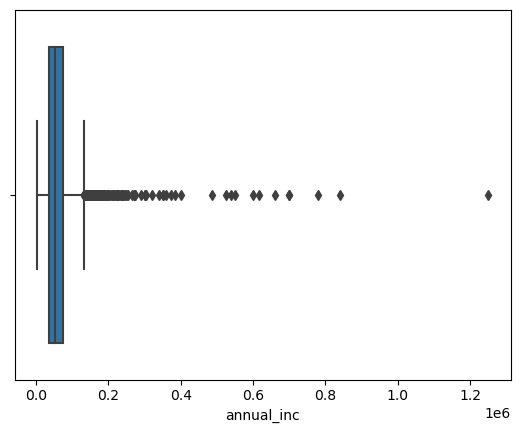

In [42]:
# let do outlier treatment on annual income of customer who have defaulted

sns.boxplot(loan_data_df['annual_inc'])
plt.show()

- We can clearly see the presence of outliers.
- We will check the quantiles and remove them from dataframe
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- let's keep the threshold for removing outliers as 0.95

In [43]:
# Let's check the quantile info
quantile_info = loan_data_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     53000.00
0.75     75000.00
0.90    103020.00
0.95    129697.20
0.97    150000.00
0.98    171483.84
0.99    205960.00
Name: annual_inc, dtype: float64

In [44]:
# we can will remove outlier from annual income

loan_data_df = loan_data_df[loan_data_df.annual_inc <= 129697.20]

In [45]:
loan_data_df.shape

(5345, 18)

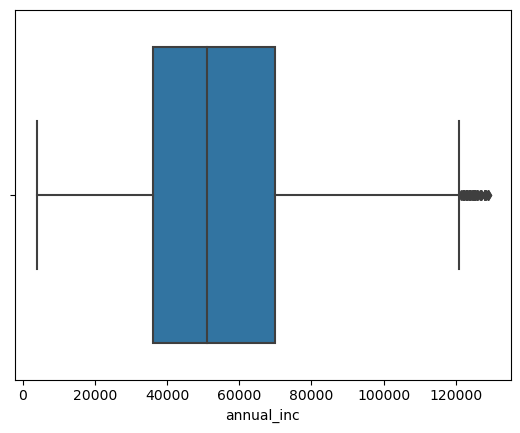

In [46]:

sns.boxplot(loan_data_df['annual_inc'])
plt.show()

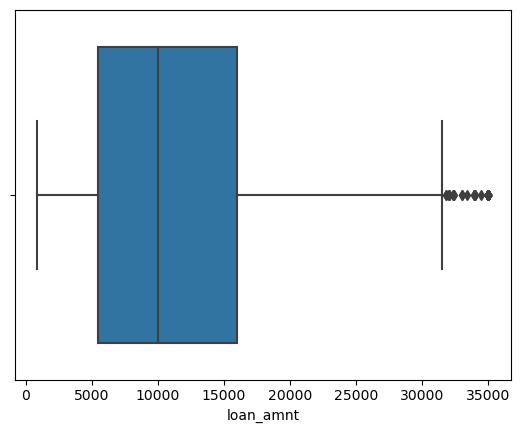

In [47]:
# let do outlier treatment on loan of customer who have defaulted

sns.boxplot(loan_data_df['loan_amnt'])
plt.show()

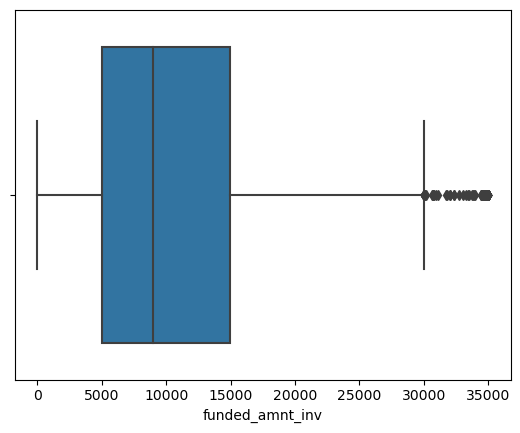

In [48]:
# let do outlier treatment on loan of customer who have defaulted

sns.boxplot(loan_data_df['funded_amnt_inv'])
plt.show()

In [49]:
# we can see there are very few outlier and as per box plot the data is mostly fairly distributed, hence we can leave it.

In [50]:
loan_data_df.annual_inc.describe()

count      5345.000000
mean      55368.628761
std       25111.427643
min        4080.000000
25%       36000.000000
50%       51000.000000
75%       70000.000000
max      129000.000000
Name: annual_inc, dtype: float64

## Derived Metric

In [51]:
#Creating Group (Bins) for the Annual Income. We're taking the lowest value and till the highest value, Taking the help from above describe() result for Min and Max
annual_inc_group = [14400,25000,50000,100000,150000,200000,234000]
annual_inc_labels = ['14K-25K','25K-50K','50K-100K','100K-150K','150K-200K','200K-250K']

In [52]:
#new column called "annual_inc_group"
loan_data_df['annual_inc_group'] = pd.cut(loan_data_df['annual_inc'], bins=annual_inc_group,
                               labels=annual_inc_labels)
loan_data_df['annual_inc_group'].value_counts()

50K-100K     2422
25K-50K      2125
14K-25K       384
100K-150K     310
150K-200K       0
200K-250K       0
Name: annual_inc_group, dtype: int64

# Exploratory Data Analysis

### Univariate Analysis

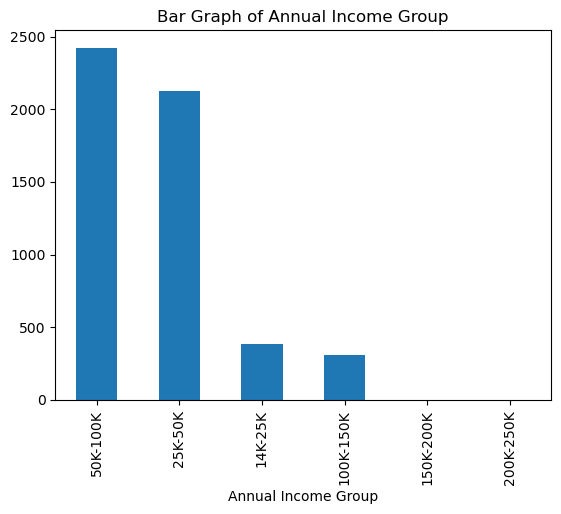

In [115]:
# Segmented Univariate Analysis 
loan_data_df['annual_inc_group'].value_counts().plot(kind='bar', title='Spread of Annual Income Group')
plt.xlabel('Annual Income Group')
plt.title('Bar Graph of Annual Income Group')
plt.show()


### Observation - From this we can see, The highest loan is issued to the income group 50K-100K USD.

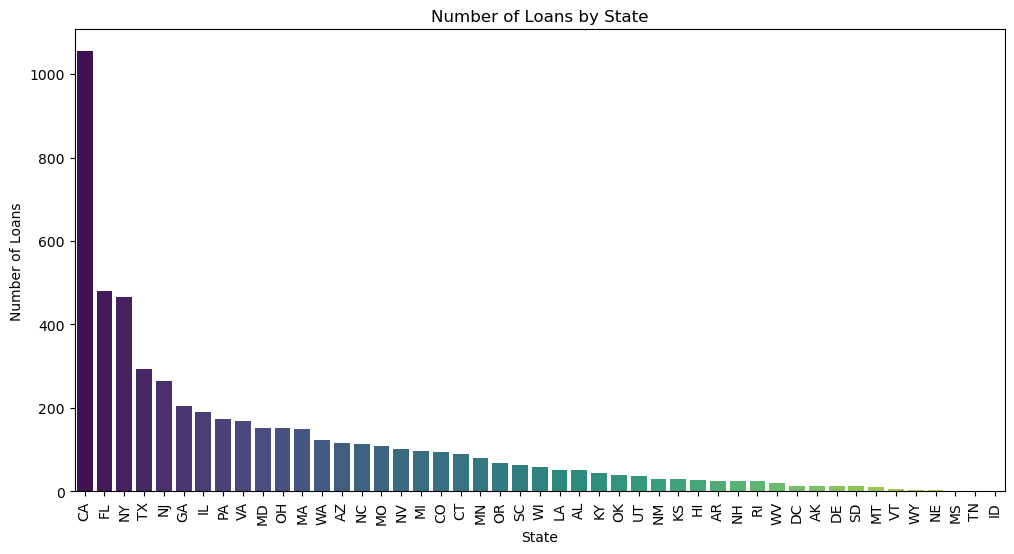

In [55]:
# Count the occurrences of each state
state_counts = loan_data_df['addr_state'].value_counts()

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.xlabel('State')
plt.ylabel('Number of Loans')
plt.title('Number of Loans by State')
plt.xticks(rotation=90)
plt.show()



1. **Distribution**: The bar plot shows the distribution of counts across different states.
2. **Highest Count**: California (CA) has the highest count, indicating it might be the state with the most loans/customers.
3. **Lowest Count**: Illinois (IL) has the lowest count among the states listed.


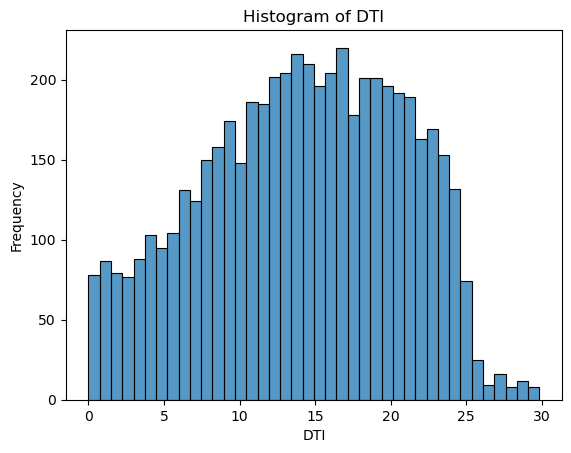

In [56]:
# Frequecny of dti of customer who have defaulted
sns.histplot(loan_data_df['dti'], bins=40, kde=False)
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.title('Histogram of DTI')
plt.show()

### From the observation above we can see that maximum number default customer have DTI between 10 to 24
### Customers where DTI is between 25 to 30 have less occurrence of defaulters.

## Bivariate Analysis

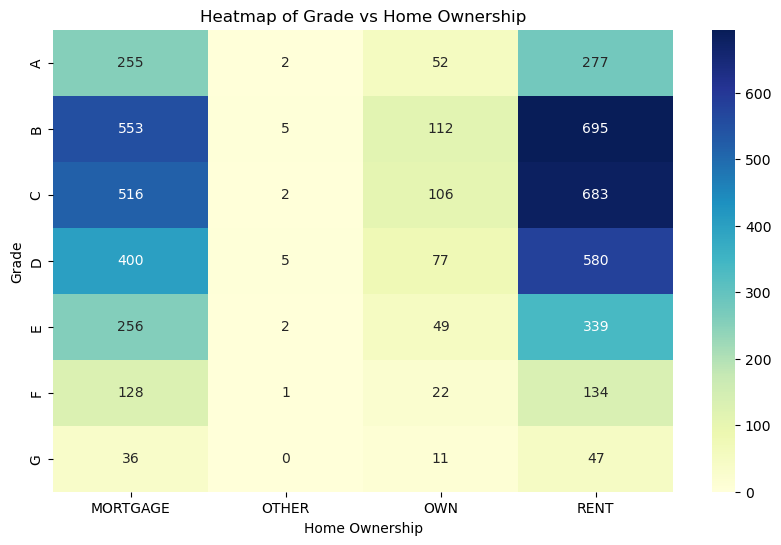

In [57]:
# Create a cross-tabulation of grade and home_ownership
cross_tab = pd.crosstab(loan_data_df['grade'], loan_data_df['home_ownership'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Home Ownership')
plt.ylabel('Grade')
plt.title('Heatmap of Grade vs Home Ownership')
plt.show()

The heatmap provides a clear visual representation of the frequency distribution of these two variables, with annotations showing the exact counts.

From Graph it is visible that customer who belongs to Grade B and C living on rent and mortgage house have much higher tendency to be defaulted on loan.

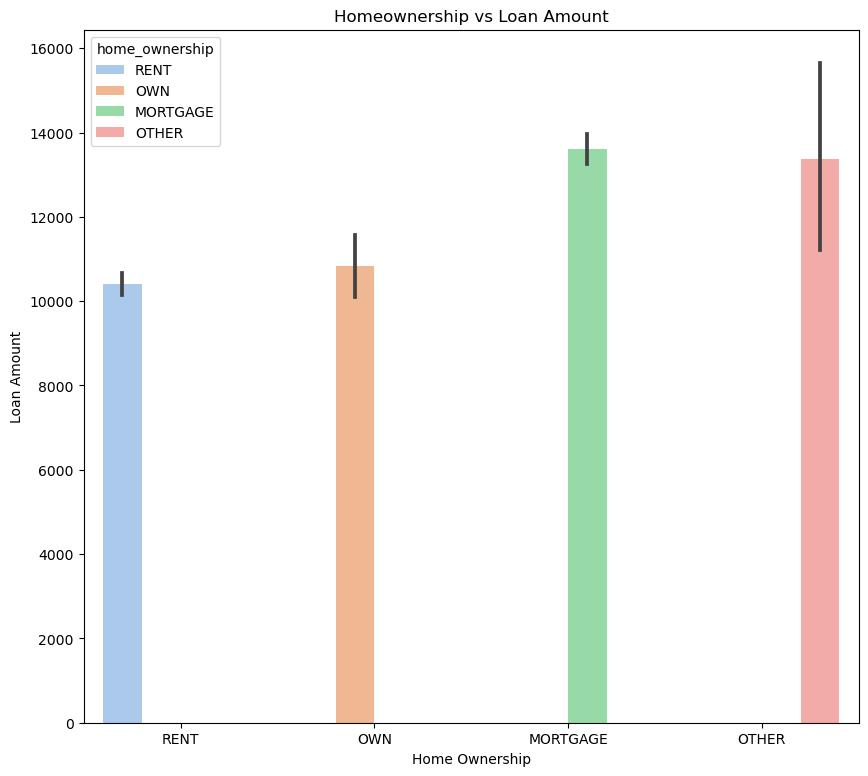

In [135]:
# Plotting Graph between HomeOwnership vs loan amount
plt.figure(figsize=(10,9))
sns.barplot(data =loan_data_df,x='home_ownership', y='loan_amnt', hue ='home_ownership',palette="pastel")
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.title('Homeownership vs Loan Amount')
plt.show()


## 1.From graph it is visible that customer which are having homeownership as Mortgage and Others have significantly more loan amount compared with rent or own category 
## 2.We have already seen then mortgage homeowner are more prone to default on loan, hence this can be consider while deciding the loan amount.



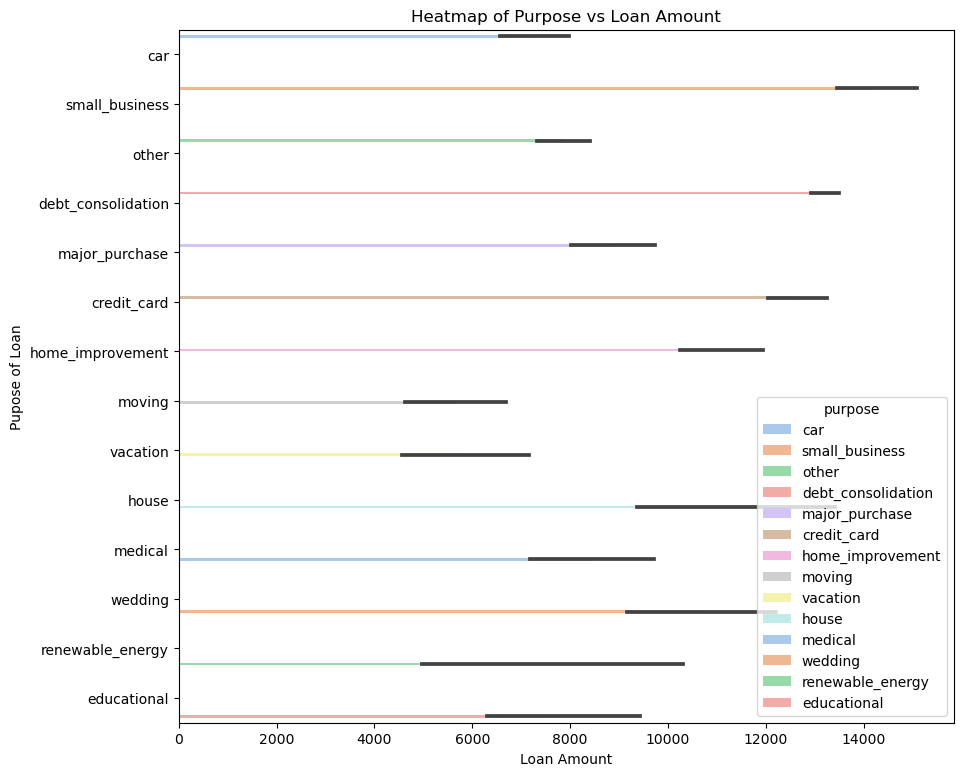

In [103]:
# Plotting Graph between Loan vs loan purpose
plt.figure(figsize=(10,9))
sns.barplot(data =loan_data_df,x='loan_amnt', y='purpose', hue ='purpose',palette="pastel")
plt.xlabel('Loan Amount')
plt.ylabel('Pupose of Loan')
plt.title('Heatmap of Purpose vs Loan Amount')
plt.show()


## From Graph we can see that most of the default customer have taken loan on for small business
## Apart from small business, debt consolidation is second highest factor for loan application

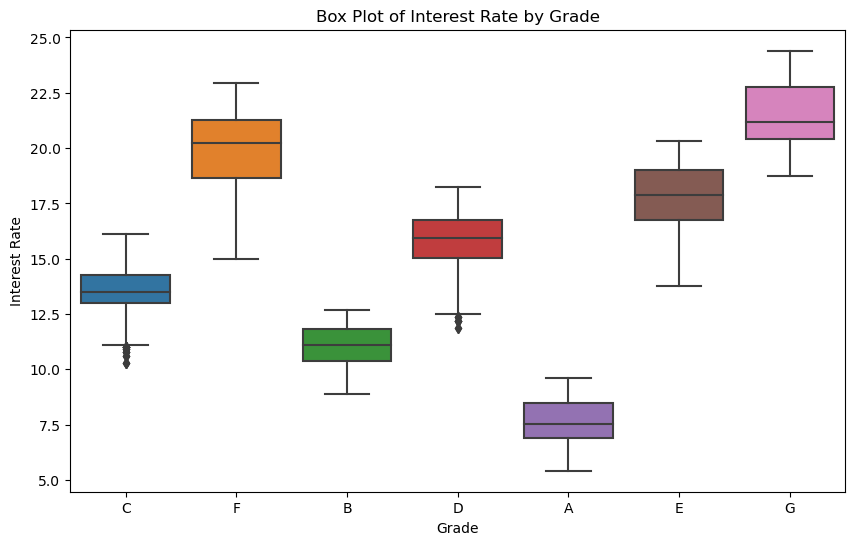

In [107]:
# Box plot to visualize the distribution of interest rates
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='int_rate', data=loan_data_df)
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.title('Box Plot of Interest Rate by Grade')
plt.show()

## Multivariate Analysis

In [118]:
numerical_features = loan_data_df.select_dtypes(exclude=['object', 'category']).columns.tolist()
loan_data_df[numerical_features].head()

,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,installment,int_rate,issue_d,loan_amnt,revol_util
1,30000.0,1.00,0,2500,2500.0,59.83,15.27,2011-12-01,2500,9.4
8,40000.0,5.55,4,5600,5600.0,152.39,21.28,2011-12-01,5600,32.6
9,15000.0,18.08,0,5375,5350.0,121.45,12.69,2011-12-01,5375,36.5
12,30000.0,10.08,0,9000,9000.0,305.38,13.49,2011-12-01,9000,91.7
14,100000.0,7.06,3,10000,10000.0,325.74,10.65,2011-12-01,10000,55.5


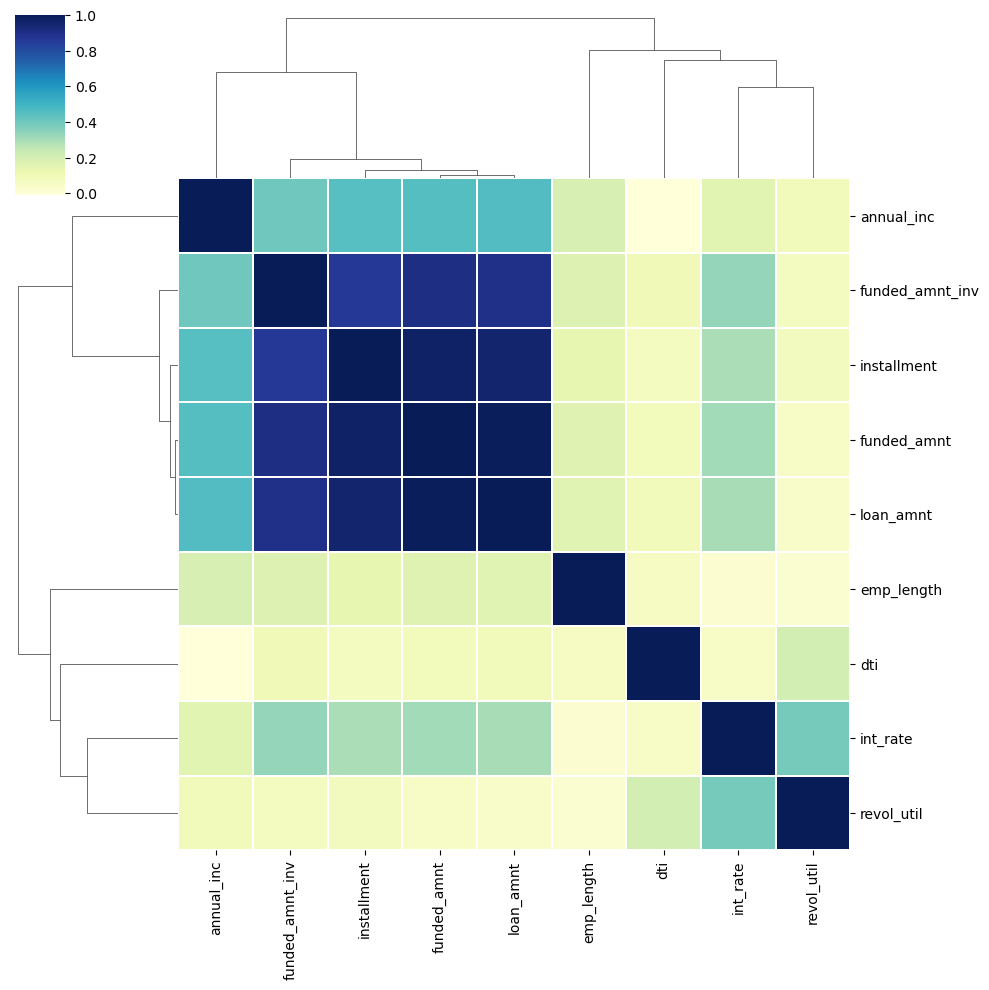

In [133]:
#correlation matrix for numeric features.
corrmat = loan_data_df[numerical_features].corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

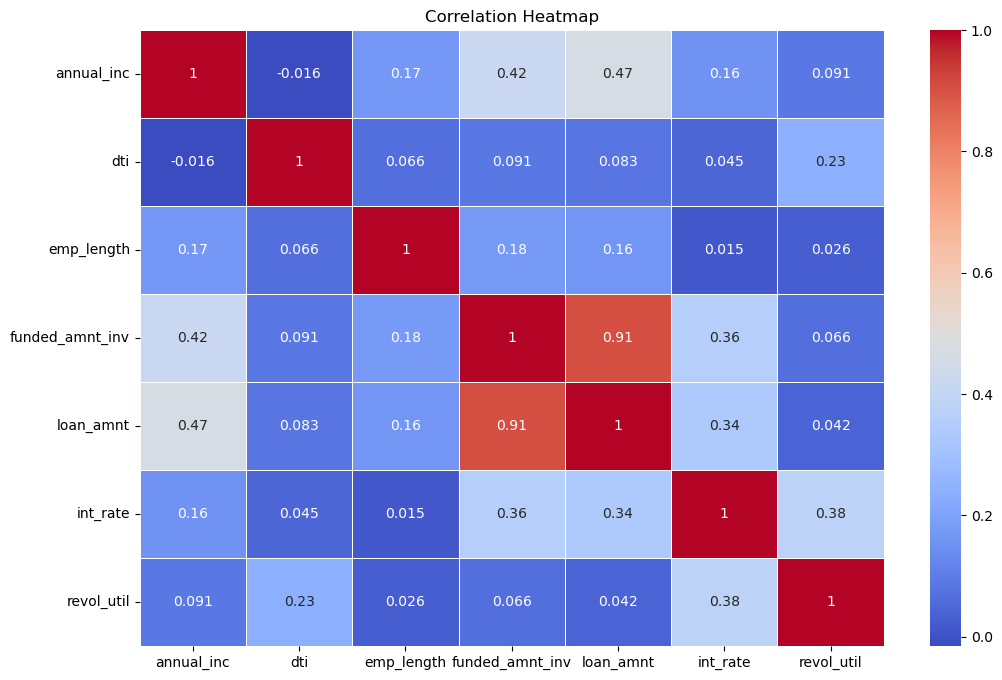

In [131]:
# Correlation heatmap to visualize correlation between variables
plt.figure(figsize=(12, 8))
correlation_matrix = loan_data_df[['annual_inc', 'dti', 'emp_length', 'funded_amnt_inv## Multivariate Analysis

numerical_features = loan_data_df.select_dtypes(exclude=['object', 'category']).columns.tolist()
loan_data_df[numerical_features].head()

#correlation matrix for numeric features.
corrmat = loan_data_df[numerical_features].corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg', 'loan_amnt', 'int_rate','revol_util']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Observations

## 1. The highest loan is issued to the income group 50K-100K USD. We can clearly see if the annual income is high, there are very less number of defaulters.
## 2. California (CA) has the highest count, indicating it might be the state with the most loans/customers. Illinois (IL) has the lowest count among the states listed.
## 3. The maximum number customer have DTI between 10 to 24. Customers where DTI is between 25 to 30 have less occurrence of defaulters
## 4. Customer who belongs to Grade B and C living on rent and mortgage house have much higher tendency to be defaulted on loan.
## 5. Mortgage and Others have significantly more loan amount compared with rent or own category.
## 6. Most of the default customer have taken loan on for small business. Apart from small business, debt consolidation is second highest factor for loan application.

 

- 

# Recommendations

## 1. Tighten eligibility criteria for loans in this income bracket to ensure borrowers can repay without overstretching their finances.
## 2.Since California has the highest number of loan defaulters, it indicates either a high volume of loans or a riskier lending environment in the state.Perform a deeper analysis of the California market, considering factors like unemployment rates, cost of living, and other socio-economic factors that might be contributing to defaults.
## 3. Consider reducing the allowable DTI ratio for higher-risk borrowers, especially in the 10-24 range, as their default rates are higher.
## 4. Apply more stringent credit assessments for renters and homeowners with lower credit grades (B and C). This might include higher interest rates or more conservative loan terms.
## 5. Introduce loan caps or tiered loan products for high-risk customers, especially for homeownership as mortgage, to avoid overextension of borrowers' financial capacities.
## 6. Implement more rigorous business assessments for small business loans, including viability checks, cash flow analysis, and business plan evaluations to ensure borrowers can repay without going into default.
## 7. Develop predictive models that monitor borrower behavior and trigger alerts for potential issues, such as missed payments, increases in debt levels, or other signs of financial strain.

